# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sinasc_RO_2019.csv')

#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [3]:
df.loc[df['APGAR5'] >= 8, 'cat_apgar5'] = 'normal'
df.loc[(df['APGAR5'] >= 6) & (df['APGAR5'] <= 7), 'cat_apgar5'] = 'asfixia_leve'
df.loc[(df['APGAR5'] >= 4) & (df['APGAR5'] <= 5), 'cat_apgar5'] = 'asfixia_moderada'
df.loc[df['APGAR5'] <= 3, 'cat_apgar5'] = 'asfixia_grave'
df['cat_apgar5']

0        normal
1        normal
2        normal
3        normal
4        normal
          ...  
27023    normal
27024    normal
27025    normal
27026    normal
27027    normal
Name: cat_apgar5, Length: 27028, dtype: object

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

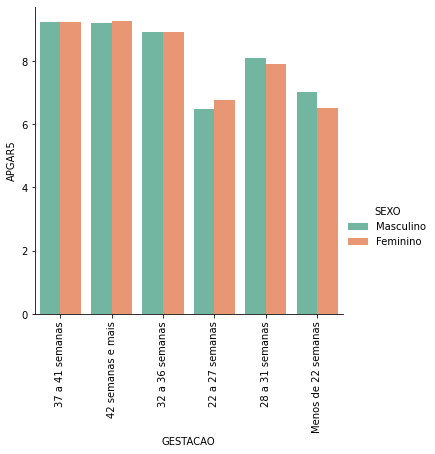

In [4]:
g = sns.catplot(x='GESTACAO'
            , y='APGAR5'
            , hue='SEXO'
            , kind='bar'
            , data=df
            , palette='Set2'
            , ci=None
           )
g = plt.xticks(rotation=90)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [5]:
freq = pd.crosstab(df['GESTACAO'], df['APGAR5'])
freq

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,7,0,8,6,1,0,2,10,24,19,8
28 a 31 semanas,0,0,2,1,5,7,7,11,61,55,13
32 a 36 semanas,2,2,2,2,8,11,17,56,362,1307,465
37 a 41 semanas,5,20,3,5,7,21,45,151,1417,13565,7284
42 semanas e mais,1,0,0,0,0,1,1,5,44,423,223
Menos de 22 semanas,1,0,1,0,0,0,0,1,0,3,1


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [6]:
per_apg_gest = freq.div(freq.sum(axis = 1), axis = 0)
per_apg_gest

APGAR5,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
GESTACAO,,,,,,,,,,,
22 a 27 semanas,0.082353,0.000000,0.094118,0.070588,0.011765,0.000000,0.023529,0.117647,0.282353,0.223529,0.094118
28 a 31 semanas,0.000000,0.000000,0.012346,0.006173,0.030864,0.043210,0.043210,0.067901,0.376543,0.339506,0.080247
32 a 36 semanas,0.000895,0.000895,0.000895,0.000895,0.003581,0.004924,0.007610,0.025067,0.162041,0.585049,0.208147
37 a 41 semanas,0.000222,0.000888,0.000133,0.000222,0.000311,0.000932,0.001998,0.006704,0.062913,0.602273,0.323403
42 semanas e mais,0.001433,0.000000,0.000000,0.000000,0.000000,0.001433,0.001433,0.007163,0.063037,0.606017,0.319484
Menos de 22 semanas,0.142857,0.000000,0.142857,0.000000,0.000000,0.000000,0.000000,0.142857,0.000000,0.428571,0.142857


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

In [7]:
new_per_apg_gest = per_apg_gest.reset_index()

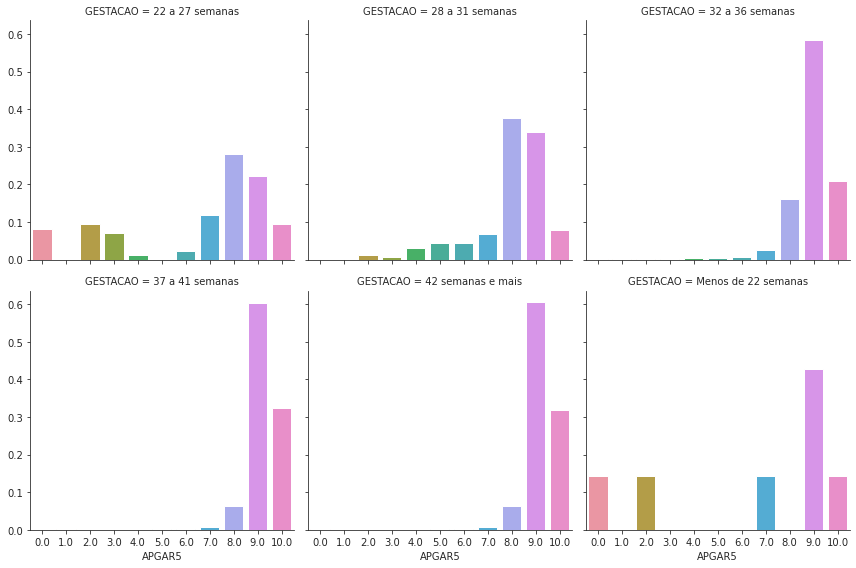

In [8]:
sns.set_style('ticks')
sns.catplot(data=new_per_apg_gest, col='GESTACAO', col_wrap=3, kind='bar', height=4, aspect=1)

Analisando o gráfico acima podemos tirar a conclusão de que em gestações com tempo maior do que 37 semanas são mais seguras, possuindo um `APGAR5` mais estável entre 7 e 10. Conforme o tempo de gestação diminui, a ocorrência de níveis mais baixo de `APGAR5` se fazem mais presentes. Em gestações com menos de abaixo de 28 semanas, conseguimos ver uma incidência considerável de asfixias graves.

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

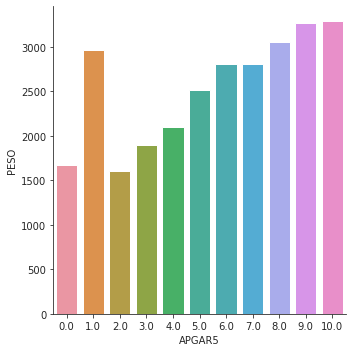

In [67]:
sns.catplot(x='APGAR5', y='PESO', data=df, kind='bar', ci=False)

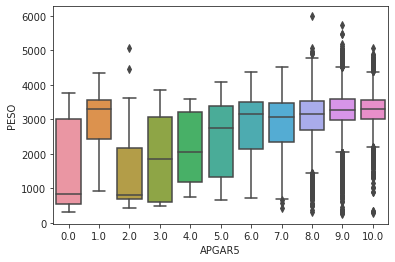

In [65]:
sns.boxplot(x='APGAR5', y='PESO', data=df)

Podemos ver que temos um padrão: quanto maior o `PESO`, maior o `APGAR5`, e, consequentemente mais saudável o bêbe. Temos um provável ponto muito fora da curva que é o `PESO` comparado com o `APGAR5` de valor 1. Sendo quase tão frequente grande quanto os melhores valores de `APGAR5`.